#문제1

**다음 중 결정 트리에 관한 질문 중 틀린 것을 모두 고르시오.** 

1. 결정 트리 알고리즘은 부모와 자식 노드 사이의 불순도 차이가 최대화되도록 학습한다.
2. 결정트리에 아무 파라미터도 주지 않은 채 학습하면 오버피팅된다.
3. 이진 분류에서 지니 불순도의 최대 값은 0.5이고 클수록 분류하기 좋지 않고, 엔트로피 불순도는 낮을수록 분류하기 좋지 않다.
4. 결정트리에서 특성 중요도는 분류를 순수하게 잘 한 기여도이고, 특성 중요도가 높을 수록 해당 노드가 중요한 분류 기준이라는 것을 의미한다. 
5. 특성 중요도가 낮다는 것은 유용하지 않은 특성이다.

3번, 5번

#문제2

**다음 내용 중 틀린 설명을 모두 고르시오.**

1. 집단의 데이터 개수만큼을 복원 추출하는 bootstrap은 모집단과 표본 집단을 추정 가능하게 한다.
2. Histogram-based Gradient Boosting은 정형 데이터를 높은 성능으로 다룬다.
3. 트리의 랜덤성이 클수록 방대한 양의 트리를 훈련해야 하기 때문에 필연적으로 계산 속도가 느려지는 문제가 발생한다.
4. random forest에서 각각의 트리는 오버피팅 될 수 있으나 각  트리의 연관성이 높을수록 random forest의 성능이 높아진다.
5. 회귀와 분류 모두에 이용 가능한 gradient boosting은 손실 함수, 약한 학습자들을 포함한다.

정답: 3번, 4번

#문제3

In [8]:
import pandas as pd
import numpy as np


fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

#data split
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

print(train_target.shape, test_target.shape)

#preprocessing
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#LR
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

from sklearn.model_selection import GridSearchCV

params = {'C': np.arange(1,200, 10)}
gs = GridSearchCV(LogisticRegression(max_iter=1000), params, n_jobs=-1)
gs.fit(train_scaled, train_target)

dt = gs.best_estimator_
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
print(gs.best_params_)

(119,) (40,)
0.9327731092436975
0.925


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


0.9915966386554622
0.925
{'C': 191}


#문제4

**다음 중 결정 트리에 관한 질문 중 틀린 것을 모두 고르시오.** 

1. 8-겹 교차 검증을 사용할 때 훈련에 사용되는 데이터는 전체 데이터의 87.5%이다.
2. 모델에서 각각의 하이퍼파라미터는 독립적으로 모델의 성능에 영향을 미친다.
3. Leave One Out Cross Validation은 Leanear regression과 polynomial regression 모델에서 더 느린 연산 속도를 가진다.
4. K-fold cross validation은 LOO cross validation에 비해 연산량이 적다.
5. Validation set Approach는 LOO cross validation에 비해 bias가 높다.
6. LOO cross validation는 모든 특성을 validation으로 사용하기 때문에 Variance은 낮다.

정답: 2번, 3번, 6번

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
(828, 5) (207, 5)
0.998792270531401
0.9227053140096618


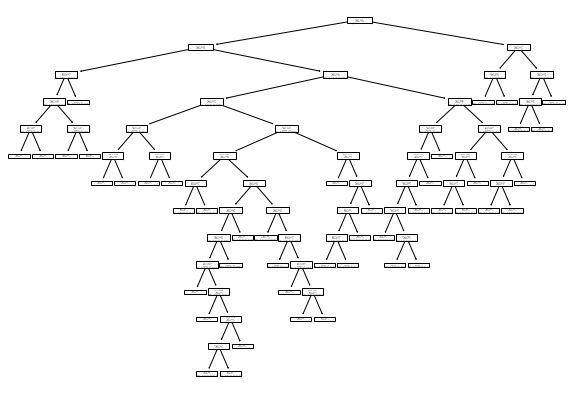

In [9]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
planets=sns.load_dataset('planets')

planets.info()


planets = planets.fillna(0)

data = planets[['number', 'orbital_period', 'mass', 'distance', 'year']].to_numpy()
target = planets[['method']].to_numpy()


from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2)

print(train_input.shape, test_input.shape)

#np.any(np.isnan(data))

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit( train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))

plot_tree(dt)
plt.show()